In [138]:
import nltk
import pandas as pd
from nltk.tokenize import TweetTokenizer
import random
# http://www.nltk.org/book/ch06.html
# http://www.nltk.org/api/nltk.tokenize.html
# http://thinknook.com/twitter-sentiment-analysis-training-corpus-dataset-2012-09-22/
# http://www.laurentluce.com/posts/twitter-sentiment-analysis-using-python-and-nltk/

In [139]:
tweets_df = pd.read_csv('Sentiment-Analysis-Dataset.csv', error_bad_lines=False)
print(tweets_df.shape[0])


b'Skipping line 8836: expected 4 fields, saw 5\n'
b'Skipping line 535882: expected 4 fields, saw 7\n'


1578612


In [140]:
# store positive and negative tweets
tweet_negative = []
tweet_positive = []

# separate the negative and positive tweets
tweet_negative = tweets_df.loc[tweets_df['Sentiment'] == 0]
tweet_positive = tweets_df.loc[tweets_df['Sentiment'] == 1]


tweet_negative['Sentiment'].replace(0, 'negative',inplace=True)
tweet_positive['Sentiment'].replace(1, 'positive',inplace=True)

# only keep tweets and their label as a list
df_negative = list(zip(tweet_negative['SentimentText'], tweet_negative['Sentiment']))
df_positive = list(zip(tweet_positive['SentimentText'], tweet_positive['Sentiment']))
        
        
print(df_negative[:10])

/home/nicolas/.local/lib/python3.5/site-packages/pandas/core/generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


[('                     is so sad for my APL friend.............', 'negative'), ('                   I missed the New Moon trailer...', 'negative'), ("          .. Omgaga. Im sooo  im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...", 'negative'), ('         i think mi bf is cheating on me!!!       T_T', 'negative'), ('         or i just worry too much?        ', 'negative'), ('       Sunny Again        Work Tomorrow  :-|       TV Tonight', 'negative'), ('      I must think about positive..', 'negative'), ('      this weekend has sucked so far', 'negative'), ('     jb isnt showing in australia any more!', 'negative'), ('     ok thats it you win.', 'negative')]


In [141]:
# create a single list of tuples each containing two elements
# First element is an array containing the words and the second element is the type of sentimenet
# We get rid of the words smaller than 2 characaters and we use lowercase for everything

# tokenize the tweets
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)

tweets = []
for (words, sentiment) in df_negative + df_positive:
    words = tknzr.tokenize(words)
    words_filtered = []
    # add some rules to better tokenize
    for e in words:
        e = e.lower()
        if ':' in e:
            e = e.replace(':', '')
        if '#' in e:
            e = e.replace('#', '')
        if '!' in e:
            e = e.replace('!', '')
        if '?' in e:
            e = e.replace('?', '')
        if ';' in e:
            e = e.replace(';', '')
        if '.' in e:
            e = e.replace('.', '')
        if ',' in e:
            e = e.replace(',', '')
        if '@' in e:
            e = e.replace('@', '')
        if len(e) >= 3:
            words_filtered.append(e)
    tweets.append((words_filtered, sentiment))
        
        
    #words_filtered = [e.lower() for e in words.split() if len(e) >= 3 and ':' not in e and '@' not in e and '!' not in e  and not '?' in e and not '.' in e and not ';' in e and not ',']
    #tweets.append((words_filtered, sentiment))
    
# shuffle the tweets dataset
random.shuffle(tweets)


In [142]:
a = '@remy: This is #waaaaayyyy too much for you!!!!!!'
a = tknzr.tokenize(a)
print(a)

[':', 'This', 'is', '#waaayyy', 'too', 'much', 'for', 'you', '!', '!', '!']


In [143]:
# training and test set
# we keep 90% for the training set and 10% for the test set
limit_set = int(tweets_df.shape[0]/10)
test_set = tweets[:2000]
training_set = tweets[1000:20000]


In [144]:
#test_set

In [145]:
# Classifier

# the list of words features need to be extracted from the tweets. 
# it is a list with every distinct words ordered by frequency of appearance

def get_words_in_tweets(tweets):
    all_words = []
    for (words, sentiment) in tweets:
        all_words.extend(words)
    return all_words

def get_word_feature(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.most_common()
    # split the list of tuples to keep the words
    word_features, freq = map(list,zip(*word_features))
    return word_features

word_features = get_word_feature(get_words_in_tweets(tweets))
print(word_features[:50])



['the', 'and', 'you', 'for', 'have', 'that', 'but', "i'm", 'just', 'with', 'not', 'was', 'this', 'now', 'good', 'day', 'get', 'all', 'out', 'like', 'are', 'today', "it's", 'too', 'your', 'love', 'going', 'work', 'got', 'lol', 'time', 'back', 'from', 'what', 'one', 'will', 'know', 'about', 'really', "don't", 'had', 'can', 'see', 'some', "can't", 'its', 'still', 'night', 'well', 'new']


In [146]:
# feature extractor
# dictionnary indicating what words are contained in the input passed
def extract_features(document):
    document_words = set(document)
    features = {}
    count = 0
    for word in word_features:
        # cerate our dictionnary of 3000 words
        if count == 3500:
            break
        
        features['contain(%s)' %word] = (word in document_words)
        count = count + 1
    return features

In [147]:
len(word_features)

385038

In [148]:
# apply feature to our classifier 
training_set = nltk.classify.apply_features(extract_features, training_set)
test_set = nltk.classify.apply_features(extract_features, test_set)
print('done')

done


In [149]:
#print(test_set)

In [150]:
# train our classifier
classifier = nltk.NaiveBayesClassifier.train(training_set)
print('done')

done


In [151]:
print(nltk.classify.accuracy(classifier, test_set))

0.7755


In [152]:
#print(test_set)

In [164]:
# saracasm dataset header
columns = ['index', 'tweets']
# read the dataframe
saracasm_df = pd.read_csv('sarcasticTweets.csv', names = columns, error_bad_lines=False)
# get rid of NaN value
saracasm_df = saracasm_df.dropna(how='any') 
print(saracasm_df.shape[0])
#saracasm_df

802


In [165]:
# sarcastic tester
#for tweet in saracasm_df.tweets:
#    print(tweet)
#sarcastic_set = nltk.classify.apply_features(extract_features, sarcastic_tweet)

In [166]:
# tokenize the tweets
tweets_sarcastic = []
for tweet_s in saracasm_df['tweets']:
    tweet_s = tknzr.tokenize(tweet_s)
    words_filtered = []
    for e in tweet_s:
        e = e.lower()
        if ':' in e:
            e = e.replace(':', '')
        if '#' in e:
            e = e.replace('#', '')
        if '!' in e:
            e = e.replace('!', '')
        if '?' in e:
            e = e.replace('?', '')
        if ';' in e:
            e = e.replace(';', '')
        if '.' in e:
            e = e.replace('.', '')
        if ',' in e:
            e = e.replace(',', '')
        if '@' in e:
            e = e.replace('@', '')
        if len(e) >= 3:
            words_filtered.append(e)
    if len(words_filtered) > 5:
        tweets_sarcastic.append(words_filtered)
#print(tweets_sarcastic)

In [167]:
# sarcastic sentiment tester
index = 0
for original_tweet in saracasm_df.tweets:
    # original tweet
    print(original_tweet)
    # tokenized tweet
    print(tweets_sarcastic[index])
    print(' ')
    # prediction
    print(classifier.classify(extract_features(tweets_sarcastic[index])))
    index = index + 1
    print(' ')
#test_set = nltk.classify.apply_features(extract_features, test_set)

Very low entries in this giveaway! Hop over and check it out! http://t.co/OrUSN9ne

['very', 'low', 'entries', 'this', 'giveaway', 'hop', 'over', 'and', 'check', 'out', 'http//tco/orusn9ne']
 
positive
 
Summers over and it was shit. Only sunny day was a bbq in north west with @Kade_96 and @Jess_birch95 hahhahaaa #amazing #sarcasm

['summers', 'over', 'and', 'was', 'shit', 'only', 'sunny', 'day', 'was', 'bbq', 'north', 'west', 'with', 'and', 'hahhahaaa', 'amazing', 'sarcasm']
 
positive
 
Did you know that one of Bolshoi Ballet members was born in Maranhão? Bruna Gaglianone is part of the Moscow group! http://t.co/LG3SME1l

['did', 'you', 'know', 'that', 'one', 'bolshoi', 'ballet', 'members', 'was', 'born', 'maranhão', 'bruna', 'gaglianone', 'part', 'the', 'moscow', 'group', 'http//tco/lg3sme1l']
 
positive
 
I just love missing the bus! ☺ #sarcasm

['just', 'love', 'missing', 'the', 'bus', 'sarcasm']
 
negative
 
If you're going into highschool and cant do at least 4 pirouettes you ob

['being', 'awake', 'this', 'early', 'pack', 'stuff', 'and', 'move', 'rooms', 'sucks', 'but', 'the', 'plus', 'side', 'fair', 'today', 'soexcited', 'sarcasm', 'carnilife']
 
negative
 
The school board's wisest budget cut has to be the one that includes new MacBook's for faculty members...#Sarcasm

['like', 'the', 'way', 'you', 'french', 'inhale', 'again']
 
positive
 
We're hiring a new Kiosk Supervisor! Think you have what it takes? Then apply! 

['love', 'you', 'more', 'than', 'this', 'kodeasikasik', 'poke', 'hahah']
 
positive
 
Deadline is September 7th, at Noon!

['thats', 'just', 'who', 'ammm', 'help', 'people', 'times', 'like', 'thesee']
 
positive
 
@Vicsterrrrr it's mint #sarcasm

["can't", 'even', 'describe', 'how', 'excited', 'cook', 'noodles', 'for', 'hours', 'sarcasm']
 
positive
 
"God will supply us with the opportunity, but it's up to us to do something with it."

['arrgghh', 'feet', 'killing', 'school', 'uniform', 'done', 'new', 'school', 'shoes', 'check', 'coat', 'bag'

['neighbours', 'come', 'round', '2say', 'they', 'away', 'for', '2weeks', 'reply', 'you', 'want', 'put', 'bins', 'out', 'you', 'leave', 'them', 'out', 'all', 'week', 'anyway', 'sarcasm']
 
negative
 
Lmfao Cinnabon followed me😂

['they', 'need', 'bring', 'back', 'the', 'kwik-e-mart', 'lls']
 
negative
 
Hate driving with people who pump their brakes! It's okay, I didn't want full movement in my neck anyways #sarcasm #whiplash

['eww', 'just', 'saw', 'this', 'nasty', 'frumpy', 'girl', 'lift', 'her', 'boob', 'and', 'scratch', 'underneath', 'just', 'puked', 'little']
 
negative
 
It's raining?! At #Marist?! What a surprise! #sarcasm

['millers', 'tonight', 'say', 'peace', 'out', 'homie', 'chasing', 'nike', 'dream', 'oregon']
 
positive
 
Time to get excited for hydraulics! Yeah buddy! #sarcasm

['think', 'hootsuite', 'pretty', 'hoot', 'hot', 'http//tco/afj0hxhw']
 
positive
 
Just got my gorgeous boyfriend another prezzie #hewilllovemeforever @wicksaay :D xxxx

["i'm", 'super', 'excited', 

Tweeter? Twits? Austin and Ally sure is creative. #omgihavetotwit #sarcasm

['maybe', 'the', 'pirates', 'will', 'pick', 'him']
 
positive
 
School was going by fast until all you fuck niggas went back.

['going', 'chapel', 'alone', 'how', 'love', 'first', 'days', 'sarcasm']
 
positive
 
@charzbrantie good job only me and you know what that means lol

['quick', 'swipe', 'with', 'sharp', 'edge', 'you', 'cut', 'apart', 'and', 'left', 'for', 'dead', 'wonder', 'they', 'call', 'you', 'razor', 'blades']
 
negative
 
I constantly see tweets about Arsenal on twitter. Thanks for keeping the world updated @ZachBaugus &amp; @shawnxh . #sarcasm #HugeArsenalFans

['you', 'sometimes', 'feel', 'that', 'there', "isn't", 'room', 'your', 'car', 'for', 'you', 'anymore', 'usual', 'rush', 'the', 'rescue', 'with', 'http//tco/te7dmg5g']
 
negative
 
I'm about to fall asleep and I still have to babysit for 3 more hours

['spotted', 'doing', 'keepy-ups', 'outside', 'the', 'etihad', 'stadium', 'idontwannagotosto

['always', 'know', 'its', 'gonna', 'good', 'day', 'when', 'wake', 'late', 'and', 'literally', 'have', 'minutes', 'get', 'ready', 'sarcasm']
 
negative
 
Imma stop snapping tho.

['eager', 'slim', 'down', 'http//tco/uve9gdv3', 'works', 'perfect', 'for', 'just', 'that']
 
positive
 
Off to Jamaica manana! Even though this trip isn't precipitated by the best circumstances, I'm looking forward to being home with fam:-)

['one', 'more', 'day', 'the', 'new', 'gnote', 'interesting', 'note', 'all', 'the', 'media', 'hype', 'toronto', 'blogs', 'for', 'this', 'event', 'notaniphone', 'sarcasm', 'elitist']
 
positive
 
Of course I have the earliest appointment at the dmv and the computers crashed last night #greatmorning #sarcasm

['best', 'part', 'test', 'track', 'the', 'pre', 'show', 'post', 'show', 'wow', 'sounds', 'awesome', 'sarcasm']
 
positive
 
@elfordminis looks awesome. How long did it take to paint?

["i've", 'completed', 'ready', 'for', 'the', 'journey', 'collection']
 
positive
 
@BenW

 
Went to the beach today! The water was SO warm! #englishsummer #sarcasm #imstubborn.

['would', 'have', 'you', 'dom', 'anddd', 'what', 'was', 'the', 'name', 'the', 'glee', 'kid', 'were', 'going', 'meet']
 
positive
 
@brandonwilson77 well shit what do you expect?!?! (; 

['miss', 'seeing', 'your', 'pissed', 'off', 'the', 'world', 'face', 'every', 'morning', 'while', 'eat', 'breakfast']
 
negative
 
Looking forward to a football filled timeline today girls #sarcasm #doigiveashit

['5391', 'tweet', 'goes', 'out', 'having', 'way', 'too', 'much', 'time', 'hands']
 
positive
 
"did you just shower?! 0.o" "no, I just took a shit -____-" LMAO 😂 #sarcasm

['thanks', 'for', 'providing', 'greenbelt', 'essentials', 'gin', 'wellies', 'sarcasm']
 
positive
 
@rachelpopky pppshttt.... nahh😏😊 #sarcasm #obsessed is and understatement

['chambers', "can't", 'explain', 'how', 'honoured', 'have', 'following', "i've", 'been', 'away', 'soo', "haven't", 'been', 'around', 'wbu']
 
positive
 
Who's excited 

 
positive
 
Yeah, I'm all about to marry someone serving life in prison. Makes perfect sense. #sarcasm

['lol', 'some', 'people', 'are', 'complete', 'fucking', 'assholes', 'other', 'people', 'thinking', 'their', 'being', 'funny', 'gofuckyourself']
 
positive
 
@GinaBaldassarre Serious, sarcastic, or Bendtner-esque? Which is a combination of seriousness, feeling lucky, and sheer cockyness. #sarcasm

['nahhh', 'house', 'music', 'has', 'interrupt', 'the', 'schedule', 'oii']
 
positive
 
I am fortunate to be able to speak the people's language. We help bring an understanding to things they already know.

['shopping', 'for', 'friends', 'daughters', 'bday', 'and', 'having', 'wayy', 'much', 'fun', 'the', 'disney', 'store']
 
positive
 
Was a Cinderella Story on tonight? Everyone seems to be distracted by a drought...? #sarcasm #ifyoucouldnttell

['lol', 'just', 'kidding', "he's", 'hamilton', 'very', 'loyal', "he's", 'very', 'smart', 'say', 'bedtime', 'runs', 'upstairs', 'bed']
 
positive
 
G

IndexError: list index out of range

In [168]:
# saracasm detector 
# first step select two datasets of each 802 sarcastic and non sarcastic tweets
# our hypothesis is that there are no sarcastics tweets in the "normal" dataset

# store positive and negative tweets
tweet_negative = []
tweet_positive = []

# separate the negative and positive tweets
tweet_negative = tweets_df.loc[tweets_df['Sentiment'] == 0]
tweet_positive = tweets_df.loc[tweets_df['Sentiment'] == 1]

# negative label to saracasm
tweet_negative['Sentiment'].replace(0, 'negative',inplace=True)
tweet_positive['Sentiment'].replace(1, 'negative',inplace=True)

# only keep tweets and their label as a list
df_negative = list(zip(tweet_negative['SentimentText'], tweet_negative['Sentiment']))
df_positive = list(zip(tweet_positive['SentimentText'], tweet_positive['Sentiment']))

# non sarcastic dataframe
non_sarcastic_df = df_negative[:401] + df_positive[:401]

positive = []
for i in range(802):
    positive.append('positive')

# sarcastic dataframe
sarcastic_df = list(zip(saracasm_df.tweets, positive))

#print(sarcastic_df)

/home/nicolas/.local/lib/python3.5/site-packages/pandas/core/generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [169]:
# we create a global dataset with the tokenized tweets
# tokenize the tweets

tweets = []
for (words, sentiment) in sarcastic_df + non_sarcastic_df:
    words = tknzr.tokenize(words)
    words_filtered = []
    for e in words:
        e = e.lower()
        if ':' in e:
            e = e.replace(':', '')
        if '#' in e:
            e = e.replace('#', '')
        if '!' in e:
            e = e.replace('!', '')
        if '?' in e:
            e = e.replace('?', '')
        if ';' in e:
            e = e.replace(';', '')
        if '.' in e:
            e = e.replace('.', '')
        if ',' in e:
            e = e.replace(',', '')
        if '@' in e:
            e = e.replace('@', '')
        if len(e) >= 3:
            words_filtered.append(e)
    if len(words_filtered) > 5:
        tweets.append((words_filtered, sentiment))
        
        
    #words_filtered = [e.lower() for e in words.split() if len(e) >= 3 and ':' not in e and '@' not in e and '!' not in e  and not '?' in e and not '.' in e and not ';' in e and not ',']
    #tweets.append((words_filtered, sentiment))
    
# shuffle the tweets dataset
random.shuffle(tweets)

In [170]:
# training and test set
# we keep 90% for the training set and 10% for the test set
limit_set = int(len(tweets)/10)
test_set = tweets[:limit_set]
training_set = tweets[limit_set:]
print(len(training_set))

1067


In [171]:

# testing the predictor
true_positive = 0
false_positive = 0
true_negative = 0
false_negative = 0
total_tweet = 0
for tweet, sentiment in test_set:
    total_tweet = total_tweet + 1
    count = 0
    words = []
    for word in tweet:
        words.append(word)
        if count == int(len(tweet)/2): 
            first = classifier.classify(extract_features(words))
            words = []
        if count == int(len(tweet)-1):
            second = classifier.classify(extract_features(words))
            words = []
        count = count + 1
    print(tweet)
    print("prediction : ", first != second)
    if first != second:
        if sentiment == 'positive':
            true_positive = true_positive + 1
        else:
            false_positive = false_positive + 1
    else:
        if sentiment == 'positive':
            false_negative = false_negative + 1
        else:
            true_negative = true_negative + 1
    print("sarcasm", sentiment == 'positive')
        
print("accuracy = ", (true_positive + true_negative)/(true_positive + true_negative + false_positive + false_negative))
print("precision = ", true_positive / (true_positive + false_positive))
print("recall = ", true_positive / (true_positive + false_negative))

['bookmarked', 'and', 'will', 'check', 'out', 'after', 'get', 'some', 'sleep', 'thanks', 'sam']
prediction :  False
sarcasm False
['did', 'you', 'know', 'that', 'one', 'bolshoi', 'ballet', 'members', 'was', 'born', 'maranhão', 'bruna', 'gaglianone', 'part', 'the', 'moscow', 'group', 'http//tco/lg3sme1l']
prediction :  True
sarcasm True
['your', 'dad', 'will', 'let', 'you', 'sit', 'there', 'fadedposter']
prediction :  False
sarcasm True
['awwwh', 'wanted', 'aiden', 'davis', 'win', 'him', 'bummed', 'didnt']
prediction :  True
sarcasm False
['case', 'feel', 'emo', 'camp', 'feeling', 'wee', 'bit', 'alr', 'bringing', 'the', 'human', 'rights', 'watch', 'world', 'report', '2009', 'hope', "it'll", 'work']
prediction :  False
sarcasm False
['keep', 'waking', 'and', 'falling', 'back', 'sleep']
prediction :  True
sarcasm True
['looks', 'have', 'lot', 'potential', 'and', 'can', 'only', 'get', 'better', 'good', 'signing', 'for', 'the', 'long', 'term', 'villa']
prediction :  False
sarcasm True
["we'

prediction :  False
sarcasm True
['well', 'praise', 'the', 'lord', 'gud', 'moods', 'kno', 'need', 'workn', 'out', 'thighs', 'these', 'dark', 'clouds', 'scaring']
prediction :  False
sarcasm False
['cars', 'being', 'inspected', 'today', 'gonna', 'cost', 'over', '600', 'dollars']
prediction :  False
sarcasm False
['lol', 'you', 'got', 'one', 'bed', 'now', 'night', 'monkey', 'see', 'you', 'some', 'time', 'soon', 'worky', 'woo']
prediction :  False
sarcasm True
['created', 'from', 'the', 'realms', 'light', 'pure', 'love', 'commands', 'the', 'fold', 'when', 'you', 'think', 'and', 'speak', 'with', 'love', 'new', 'world', "you'll", 'behold']
prediction :  False
sarcasm False
['but', 'mustache', 'man', 'not', 'that', 'desperate']
prediction :  True
sarcasm False
['the', 'natalee', 'holloway', 'movie', 'makes', 'wanna', 'cry']
prediction :  True
sarcasm True
['thanks', 'need', 'all', 'the', 'help', 'can', 'get']
prediction :  False
sarcasm False
["archie's", 'annoying', 'this', 'morning', 'says

In [120]:
accuracy =  [0.4152542372881356, 0.4830508474576271, 0.423728813559322, 0.4830508474576271, 0.4406779661016949, 0.5084745762711864, 0.5, 0.423728813559322]
precision =  [0.44680851063829785, 0.5777777777777777, 0.6511627906976745, 0.5405405405405406, 0.5581395348837209, 0.6153846153846154, 0.6097560975609756, 0.52]
recall =  [0.328125, 0.4, 0.3783783783783784, 0.28169014084507044, 0.34782608695652173, 0.45714285714285713, 0.36764705882352944, 0.37142857142857144]


In [121]:
import matplotlib.pyplot as plt
%matplotlib inline

In [189]:
def detector(tweet):
    words = []
    print(tweet)
    tweet = tknzr.tokenize(tweet)
    count = 0
    for word in tweet:
        words.append(word)
        if count == int(len(tweet)/2): 
            first = classifier.classify(extract_features(words))
            print(first)
            words = []
        if count == int(len(tweet)-1):
            second = classifier.classify(extract_features(words))
            print(second)
            words = []
        count = count + 1

    print(tweet)
    print("prediction : ", first != second)

accuracy average :  0.459745762712
precision average :  0.564946233435
recall average :  0.366529761697


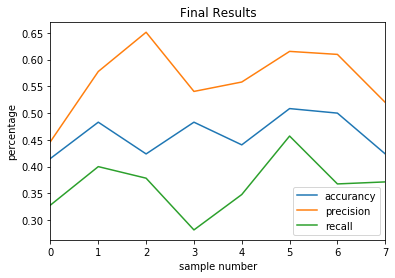

In [190]:
import numpy as np

d = {'accurancy' : accuracy,
     'precision' : precision,
     'recall' : recall }

df = pd.DataFrame(d)

plot = df.plot()
plot.set_xlabel("sample number")
plot.set_ylabel("percentage")
plot.set_title("Final Results")

print("accuracy average : ",np.mean(accuracy))
print("precision average : ",np.mean(precision))
print("recall average : ",np.mean(recall))

In [195]:
detector("I am good I just have 5 finals tomorrow")

I am good I just have 5 finals tomorrow
positive
negative
['I', 'am', 'good', 'I', 'just', 'have', '5', 'finals', 'tomorrow']
prediction :  True
